In [1]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
import math
import os
from scipy.special import legendre

In [2]:
radian = 180/math.pi
lmax = 64
random_map_number = 100

In [3]:
NSIDE = 256
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)

Approximate resolution at NSIDE 256 is 0.23 deg


In [4]:
NPIX = hp.nside2npix(NSIDE)
#print(NPIX)

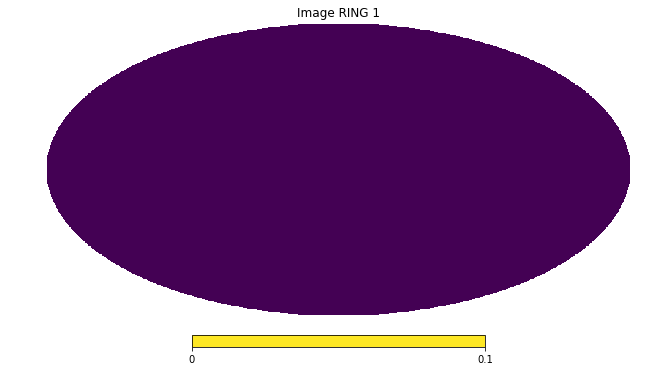

In [5]:
m = np.zeros(NPIX)
hp.mollview(
    m,
    title="Image RING 1",
    norm="hist",
    min=0,
    max=0.1)

In [6]:
vec = hp.ang2vec(np.random.random()*np.pi,np.random.random()*2.*np.pi)
print(vec)

[0.64536605 0.28393804 0.70914163]


In [7]:
ipix_disc = hp.query_disc(nside=NSIDE, vec=vec, radius=np.radians(10))

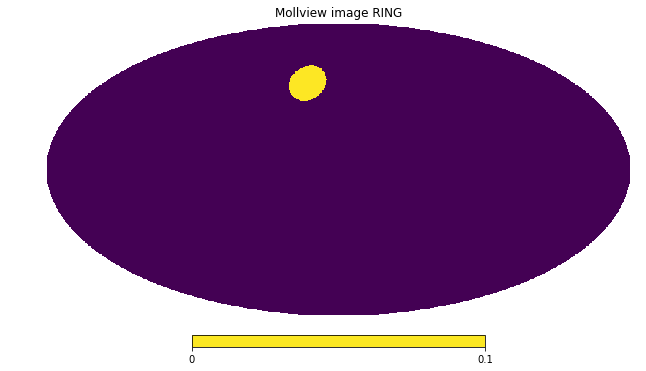

In [8]:
m = np.zeros(NPIX)
m[ipix_disc] = 0.1
hp.mollview(
    m,
    title="Mollview image RING",
    norm="hist",
    min=0,
    max=0.1)

In [9]:
def rotate_map(hmap, rot_theta, rot_phi):
    """
    Take hmap (a healpix map array) and return another healpix map array 
    which is ordered such that it has been rotated in (theta, phi) by the 
    amounts given.
    """
    nside = hp.npix2nside(len(hmap))
    # Get theta, phi for non-rotated map
    t,p = hp.pix2ang(nside, np.arange(hp.nside2npix(nside))) #theta, phi
    # Define a rotator
    r = hp.Rotator(deg=False, rot=[rot_theta,rot_phi])
    # Get theta, phi under rotated co-ordinates
    trot, prot = r(t,p)
    # Interpolate map onto these co-ordinates
    rot_map = hp.get_interp_val(hmap, trot, prot)
    return rot_map